In [1]:
#Bibliotecas 
import numpy as np 
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

**Ejercicio 1:**\
Por favor grafique en el espacio fase una familia de soluciones y determine el tipo de punto crítico de cada uno de los siguientes sistemas de ecuaciones.\
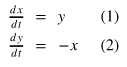

Sabemos que la matriz que utilizaremos es esta:\
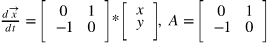

In [2]:
#Realizamos la matriz:
A = np.array([[0,1], [-1,0]])
print("A = ", A)


A =  [[ 0  1]
 [-1  0]]


In [3]:
#Traza de la matriz
p = np.trace(A)
print("Tr(A) = p = ", p)

Tr(A) = p =  0


In [4]:
#Determinante de la matriz
q = la.det(A)
print("det(A) = q = ", q)

det(A) = q =  1.0


In [5]:
#Raices
dis = p**2 - 4*q
if (dis < 0):
  #Aplicamos valor absoluto para los cálculos
  absdis = abs(dis)
  λ1 = (p + np.sqrt(absdis))*(1/2)
  λ2 = (p - np.sqrt(absdis))*(1/2)
#Raices imaginarias
  print("λ1 = ", λ1, "i")
  print("λ2 = ", λ2,"i")
else:
  λ1 = (p + np.sqrt(dis))*(1/2)
  λ2 = (p - np.sqrt(dis))*(1/2)
#Raices reales
print("λ1 =", λ1)
print("λ2 =", λ2)

λ1 =  1.0 i
λ2 =  -1.0 i
λ1 = 1.0
λ2 = -1.0


Vamos que la matriz pertenece al siguiente caso:\
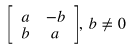

La solución:\
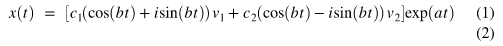
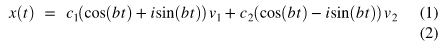

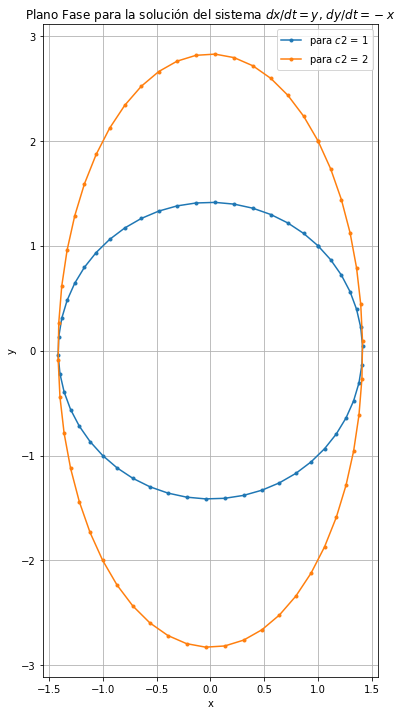

In [6]:
#Solucionando la ecuación diferencial:
#Condiciones:
π = np.pi
t = np.linspace(0, 2*π, 51)

c1 = 1
c2 = 1
c3 = 2

a = 0
b= 1
#Base canónico
v1 = np.array( [ [ 1 ], [ 0 ] ] )
v2 = np.array( [ [ 0 ], [ 1 ] ] )

#Definir calcular la solución:
def x( t, a, b, c1, c2, v1, v2 ):
#Primer término de la solución
    w1 = c1*( np.cos( b*t ) + np.sin( b*t ) )*v1
#Segundo término de la solución
    w2 = c2*( np.cos( b*t ) - np.sin( b*t ) )*v2
#Factor de la solución
    c = np.exp( a*t )
    return (w1 + w2)*c
#Solución para c1 = 1 y c2 = 1
Sol1 = x( t, a, b, c1, c2, v1, v2 )
xx1 = Sol1[ 0, : ]
xy1 = Sol1[ 1, : ]
Sol2 = x( t, a, b, c1, c3, v1, v2 )
xx2 = Sol2[ 0, : ]
xy2 = Sol2[ 1, : ]
#Graficando
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, ".-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, ".-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = y$, $dy/dt = -x$" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

**Ejercicio 2.**\
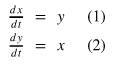\
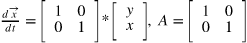

In [7]:
#Como conocemos la matriz y hacemos el mismo procedimiento anteriormente:
A = np.array( [ [ 1, 0 ], [ 0, 1 ] ] )
print("A = ", A)
#Calculamos la traza de A
p = np.trace( A )
print( "Tr(A) = p = ", p)
#Calculamos el determinante
q = la.det( A )
print( "det(A) = q = ", q)
#Raices:
dis = p**2 - 4*q
if ( dis < 0 ):
#Valor absoluto
  absdis = abs ( dis )
  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 ) 
  #Raices imaginarias
  print( " λ1 = ", λ1, "i" ) 
  print( " λ2 = ", λ2, "i" )
else:
  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 
#Raices Reales:
  print( " λ1 = ", λ1 ) 
  print( " λ2 = ", λ2 )

A =  [[1 0]
 [0 1]]
Tr(A) = p =  2
det(A) = q =  1.0
 λ1 =  1.0
 λ2 =  1.0


Pertenece al caso A.
La solución, entonces:\
image.png

Eigenvalores de A :  [1.+0.j 1.+0.j]
[[1. 0.]
 [0. 1.]]  : Eigenvectores de A
[[1]
 [0]]  = v1 
[[0]
 [1]]  = v2 


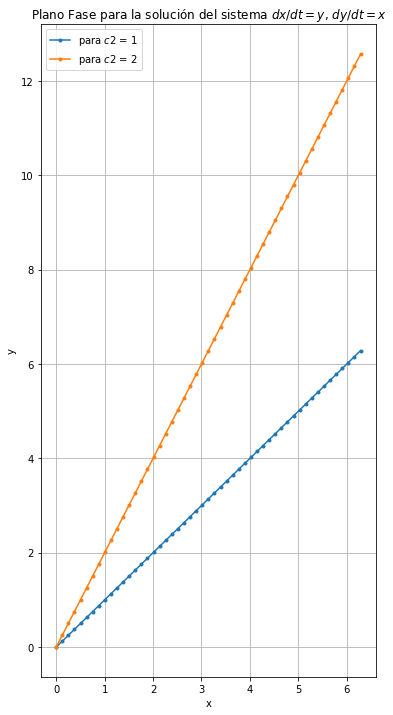

In [8]:
#Condiciones
π = np.pi
t = np.linspace( 0, 2*π, 51 )
λ = 1
μ = 1
c1 = 1
c2 = 1
c3 = 2

#Eigenvalores y Eigenvectores
eigvals, eigvecs = la.eig( A )
print( "Eigenvalores de A : ", eigvals )
print( eigvecs, " : Eigenvectores de A" )
#Eigenvector 1
eigv1 = ( eigvecs[:,0] ) # ( [ 1 ], [ 0 ] )
v1 = np.array( [ [ 1 ], [ 0 ] ] )
print( v1, " = v1 " )
#Eigenvector 2
eigv2 = ( eigvecs[:,1] ) # ( [ 0 ], [ 1 ] )
v2 = np.array( [ [ 0 ], [ 1 ] ] )
print( v2, " = v2 " )

#Definir la solución:
def x( t, λ, μ, c1, c2, v1, v2 ):
  w1 = c1*( t**λ )*v1
  w2 = c2*( t**μ )*v2
  return w1 + w2
#Solución para C1 = 1 y C2 = 1
Sol1 = x( t, λ, μ, c1, c2, v1, v2 )
xx1 = Sol1[ 0, : ]
xy1 = Sol1[ 1, : ]
Sol2 = x( t, λ, μ, c1, c3, v1, v2 )
xx2 = Sol2[ 0, : ]
xy2 = Sol2[ 1, : ]
#Graficamos
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, ".-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, ".-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = y$, $dy/dt = x$" )
plt.xlabel( "x" )
plt.ylabel( "y" )

plt.grid()
plt.show()

**Ejercicio 3.**\
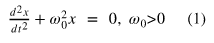\
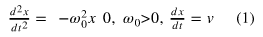\
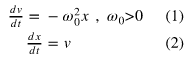\
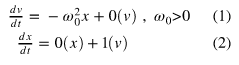\
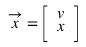\
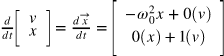\
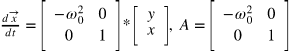


In [9]:
#Ya que conocemos la matriz, la definimos
ω0 = 1

A = np.array( [ [ - ω0**2 , 0 ], [ 0, 1 ] ] )
print( A, " = A" )
#Traza de la matriz
p = np.trace( A )
print( "Tr(A) = p = ", p)
#Determinante de la matriz
q = la.det( A )
print( "det(A) = q = ", q)
#Las raices son:
dis = p**2 - 4*q
if ( dis < 0 ):
  absdis = abs ( dis )
  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  
#Raices imaginarias
  print( " λ1 = ", λ1, "i" ) 
  print( " λ2 = ", λ2, "i" )
else:
  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 

  print( " λ1 = ", λ1 ) 
  print( " λ2 = ", λ2 )

[[-1  0]
 [ 0  1]]  = A
Tr(A) = p =  0
det(A) = q =  -1.0
 λ1 =  1.0
 λ2 =  -1.0


Pertenece al caso A.
La solución es:\
image.png


Eigenvalores de A :  [-1.+0.j  1.+0.j]
[[1. 0.]
 [0. 1.]]  : Eigenvectores de A
[[1]
 [0]]  = v1 
[[0]
 [1]]  = v2 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


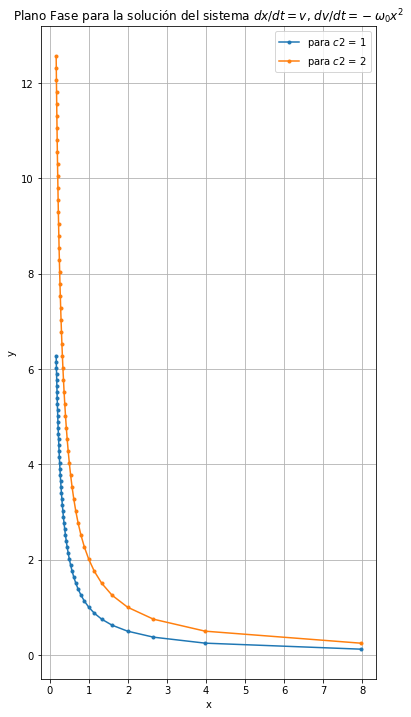

In [10]:
#Condiciones del problema
π = np.pi
t = np.linspace( 0, 2*π, 51 )
λ = - ω0**2
μ = 1
c1 = 1
c2 = 1
c3 = 2
#Eigenvalores y Eigenvectores
eigvals, eigvecs = la.eig( A )
print( "Eigenvalores de A : ", eigvals )
print( eigvecs, " : Eigenvectores de A" )
#Eigenvector 1
eigv1 = ( eigvecs[:,0] ) 
v1 = np.array( [ [ 1 ], [ 0 ] ] )
print( v1, " = v1 " )
#Eigenvector 2
eigv2 = ( eigvecs[:,1] )
v2 = np.array( [ [ 0 ], [ 1 ] ] )
print( v2, " = v2 " )
#Función para la solución
def x( t, λ, μ, c1, c2, v1, v2 ):
  w1 = c1*( t**λ )*v1
  w2 = c2*( t**μ )*v2
  
  return w1 + w2
#Solcuion para C1 = 1 y C2 = 1
Sol1 = x( t, λ, μ, c1, c2, v1, v2 )
xx1 = Sol1[ 0, : ]
xy1 = Sol1[ 1, : ]
Sol2 = x( t, λ, μ, c1, c3, v1, v2 )
xx2 = Sol2[ 0, : ]
xy2 = Sol2[ 1, : ]
#Grafica
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx1, xy1, ".-", label = "para $c2$ = 1" )
plt.plot( xx2, xy2, ".-", label = "para $c2$ = 2" )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del sistema $dx/dt = v$, $dv/dt = - \omega_0x^{2}$" )
plt.xlabel( "x" )
plt.ylabel( "y" )

plt.grid()
plt.show()

**Ejercicio 4.**\
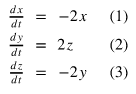\
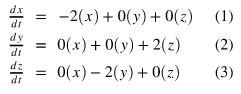\
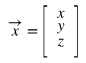\
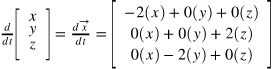\
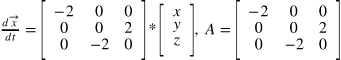

In [11]:
A = np.array( [ [ -2, 0, 0 ], [ 0, 0, 2 ], [ 0, -2, 0 ] ] )
print( A, " = A " )

[[-2  0  0]
 [ 0  0  2]
 [ 0 -2  0]]  = A 


In [12]:
p = np.trace( A )
print( "Tr(A) = ", p)

Tr(A) =  -2


In [13]:
q = la.det( A )
print( "det(A) = ", q)

det(A) =  -8.0


In [14]:
eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )

[ 0.+2.j  0.-2.j -2.+0.j]  : Eigenvalores 


In [15]:
print( eigvecs, " : Eigenvectores " )

[[ 0.        +0.j          0.        -0.j          1.        +0.j        ]
 [-0.70710678+0.j         -0.70710678-0.j          0.        +0.j        ]
 [ 0.        -0.70710678j  0.        +0.70710678j  0.        +0.j        ]]  : Eigenvectores 


In [16]:
Λ = np.array( [ [ complex( 0, 2 ), 0, 0 ], 
                [ 0, complex( 0, -2 ), 0 ], 
                [ 0, 0, -2 ] ] )
print("Λ = ", Λ)

Λ =  [[ 0.+2.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-2.j  0.+0.j]
 [ 0.+0.j  0.+0.j -2.+0.j]]


In [17]:
eigvec = np.array( [ [ 0, 0, 1 ],  
                     [ - np.sqrt( 2 )/2 , - np.sqrt( 2 )/2, 0 ], 
                     [ complex( 0, - np.sqrt( 2 )/2 ), complex( 0, np.sqrt( 2 )/2 ), 0 ] ] )
print(eigvec, "= P")

[[ 0.        +0.j          0.        +0.j          1.        +0.j        ]
 [-0.70710678+0.j         -0.70710678+0.j          0.        +0.j        ]
 [ 0.        -0.70710678j  0.        +0.70710678j  0.        +0.j        ]] = P


In [18]:
print( la.inv( eigvec), " = P^-1 " )

[[-0.        -0.j         -0.70710678+0.j          0.        +0.70710678j]
 [-0.        -0.j         -0.70710678+0.j          0.        -0.70710678j]
 [ 1.        -0.j          0.        +0.j          0.        +0.j        ]]  = P^-1 


In [19]:
prod = eigvec @ Λ @ la.inv ( eigvec ) 
print(prod)

[[-2.+0.00000000e+00j  0.+0.00000000e+00j  0.+0.00000000e+00j]
 [ 0.+0.00000000e+00j  0.+2.02930727e-17j  2.+0.00000000e+00j]
 [ 0.+0.00000000e+00j -2.+0.00000000e+00j  0.+2.02930727e-17j]]


In [20]:
eigvals = np.array( [ -2, complex( 0, 2 ), complex( 0, -2 ) ] )
print( " Eigenvalores : ", eigvals )

 Eigenvalores :  [-2.+0.j  0.+2.j  0.-2.j]


In [21]:
Λ = np.array( [ [ -2, 0, 0 ], 
                [ 0, complex( 0, 2 ), 0 ], 
                [ 0, 0, complex( 0, -2 ) ] ] )

print( Λ, " = Λ " )

[[-2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+2.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.-2.j]]  = Λ 


In [22]:
eig1 = np.array( [ [ 1 ], [ 0 ], [ 0 ] ] )
eig2 = np.array( [ [ 0 ], [ complex( 0, -1 ) ], [ 1 ] ] )
eig3 = np.array( [ [ 0 ], [ complex( 0, 1 ) ], [ 1 ] ] )
print( eig1, " = v1 " )
print( eig2, " = v2 " )
print( eig3, " = v3 " )

[[1]
 [0]
 [0]]  = v1 
[[0.+0.j]
 [0.-1.j]
 [1.+0.j]]  = v2 
[[0.+0.j]
 [0.+1.j]
 [1.+0.j]]  = v3 


In [23]:
eigvec = np.array( [ [ 1, 0, 0 ],  
                     [ 0, complex( 0, -1), complex( 0, 1 ) ], 
                     [ 0, 1, 1 ] ] )

print( eigvec, " = P " )
print( la.inv( eigvec ), " = P^-1 " )
prod = eigvec @ Λ @ la.inv ( eigvec )
print( prod, " = A " ) 

[[1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+1.j]
 [0.+0.j 1.+0.j 1.+0.j]]  = P 
[[ 1. -0.j   0. -0.j  -0. -0.j ]
 [ 0. +0.j   0. +0.5j  0.5-0.j ]
 [ 0. +0.j   0. -0.5j  0.5-0.j ]]  = P^-1 
[[-2.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  2.+0.j]
 [ 0.+0.j -2.+0.j  0.+0.j]]  = A 


Los casos cumplen:\
image.png\
image.png\
image.png\
image.png\
image.png\
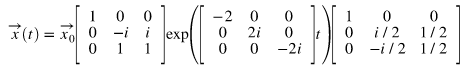\
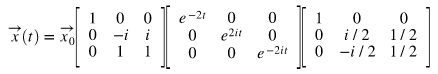\
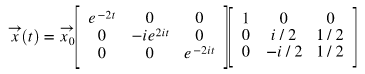\
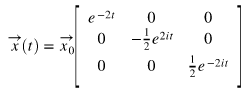\
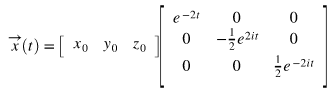\
image.png\
image.png\
image.png

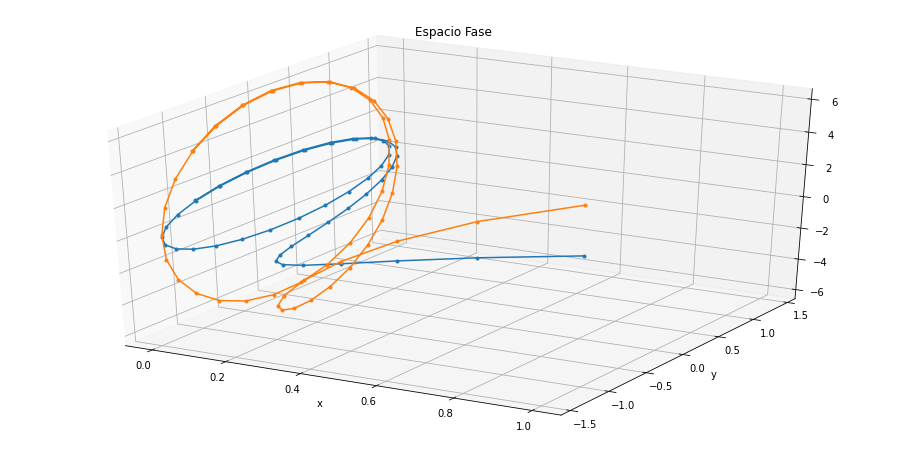

In [24]:
t = np.linspace( 0, 2*np.pi, 51 )
cond0 = np.array( [ 1, 2, 3 ] )
c1 = 1
c2 = 1
c3 = 1
c4 = 3
def x( x0, t, c1, c2, c3 ):
  compx = x0[ 0 ]
  compy = x0[ 1 ]
  compz = x0[ 2 ]
    # print( x0 )
    # print( y0 )
    # print( z0 ) 
  x = c1 * compx * np.exp( -2*t )
  y = c2 * ( np.cos( 2*t ) + np.sin( 2*t ) )*( -compy/2 )
  z = c3 * ( np.cos( 2*t ) - np.sin( 2*t ) )*( compz/2 )
  sol = np.array( [ x, y, z ] )
  return sol
#Primera solución
Solve1 = x( cond0, t, c1, c2, c3 )
xx1 = Solve1[ 0, : ]
xy1 = Solve1[ 1, : ]
xz1 = Solve1[ 2, : ]
#Segunda solución
Solve2 = x( cond0, t, c1, c2, c4 )
xx2 = Solve2[ 0, : ]
xy2 = Solve2[ 1, : ]
xz2 = Solve2[ 2, : ]
#Creamos la figura
fig = plt.figure( figsize = ( 16, 8 ))
#Plano 3d.
ax1 = fig.add_subplot( 111, projection = "3d" )
plt.plot( xx1, xy1, xz1, ".-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, ".-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase" )
plt.xlabel( "x" )
plt.ylabel( "y" )
#plt.zlabel( "z" )
plt.show()

**Ejercicio 5.**\
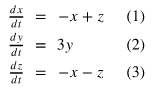\
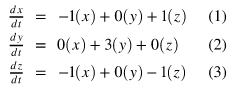\
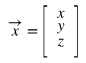\
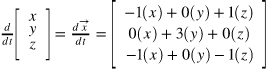\
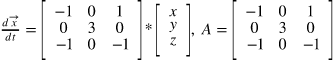

In [25]:
#Matriz A
A = np.array( [ [ -1, 0, 1 ], [ 0, 3, 0 ], [ -1, 0, -1 ] ] )
print( A, " = A " )

[[-1  0  1]
 [ 0  3  0]
 [-1  0 -1]]  = A 


In [26]:
#Traza de la matriz A
p = np.trace( A )
print( "Tr(A) = ", p, " : Traza de la Matriz" )

Tr(A) =  1  : Traza de la Matriz


In [27]:
#Determinante
q = la.det( A )
print( "det(A) = ", q)

det(A) =  6.0


In [28]:
#Eigenvalores y eigenvectores
eigvals, eigvecs = la.eig( A )
print( eigvals, " : Eigenvalores " )
print( eigvecs, " : Eigenvectores " )


[-1.+1.j -1.-1.j  3.+0.j]  : Eigenvalores 
[[0.70710678+0.j         0.70710678-0.j         0.        +0.j        ]
 [0.        +0.j         0.        -0.j         1.        +0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j 0.        +0.j        ]]  : Eigenvectores 


In [29]:
Λ = np.array( [ [ complex( -1, 1 ), 0, 0 ], 
                [ 0, complex( -1, -1 ), 0 ], 
                [ 0, 0, 3 ] ] )

print( Λ, " = Λ " )

[[-1.+1.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.-1.j  0.+0.j]
 [ 0.+0.j  0.+0.j  3.+0.j]]  = Λ 


In [30]:
prod = la.inv( eigvecs ) @ Λ @ eigvecs

print( prod )

[[ 1.+0.5j -2.+0.5j  0.+0.j ]
 [-2.+0.5j  1.+0.5j  0.+0.j ]
 [ 0.+0.j   0.+0.j  -1.-1.j ]]


La solución entonces:\
image.png

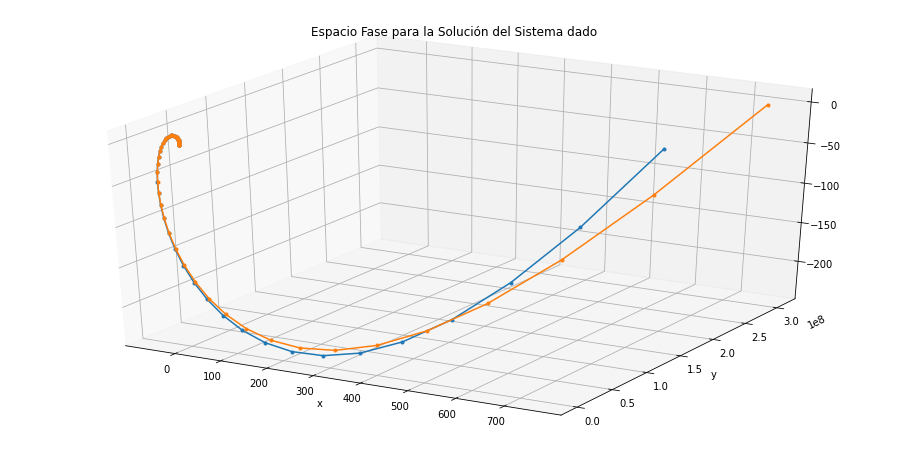

In [31]:
t = np.linspace( 0, 2*np.pi, 51 )

c1 = 1
c2 = 1
c3 = 1
c4 = 2

v1 = np.array( [ [ np.sqrt( 2 )/2 ], [ 0 ], [   np.sqrt( 2 )/2 ] ] )
v2 = np.array( [ [ np.sqrt( 2 )/2 ], [ 0 ], [ - np.sqrt( 2 )/2 ] ] )
v3 = np.array( [ [ 0 ], [ 1 ], [ 0 ] ] )

def x( t, c1, c2, c3, v1, v2, v3 ):
  w1 = c1 * ( np.cos( t ) + np.sin( t ) ) * v1
  w2 = c2 * ( np.cos( t ) - np.sin( t ) ) * v2
  k = np.exp( t )
  w3 = c3 * np.exp( 3*t ) * v3
  sol = ( w1 + w2 ) * k + w3
  return sol

Solve1 = x( t, c1, c2, c3, v1, v2, v3 )
xx1 = Solve1[ 0, : ]
xy1 = Solve1[ 1, : ]
xz1 = Solve1[ 2, : ]
  
Solve2 = x( t, c1, c2, c4, v1, v2, v3 ) 
xx2 = Solve2[ 0, : ]
xy2 = Solve2[ 1, : ]
xz2 = Solve2[ 2, : ]
  

fig = plt.figure( figsize = ( 16, 8 )) 
#Plano 3d
ax1 = fig.add_subplot( 111, projection = "3d" ) 
plt.plot( xx1, xy1, xz1, ".-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, ".-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase para la Solución del Sistema dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
# plt.zlabel( "z" )
plt.show()

Resuelva los siguientes problemas de valor inicial.\
**Ejercicio 6:**\
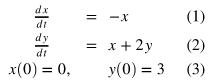


In [32]:
#Agregamos la matriz A.
A = np.array( [ [ -1, 0 ], [ 1, 2 ] ] )
print("A = ", A)

A =  [[-1  0]
 [ 1  2]]


In [33]:
#Traza de la matriz
p = np.trace( A )
print("Tr(A) = p = ", p)

Tr(A) = p =  1


In [34]:
#Determinante de la matriz
q = la.det(A)
print("det(A) = q = ", q)

det(A) = q =  -2.0


In [35]:
#Raices
dis = p**2 - 4*q
if ( dis < 0 ):

  absdis = abs ( dis )
  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  
#Raices imaginarias
  print( " λ1 = ", λ1, "i" )
  print( " λ2 = ", λ2, "i" )
else:
  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 
#Raices reales
  print( " λ1 = ", λ1 )
  print( " λ2 = ", λ2 )
eigvals, eigvecs = la.eig( A )
print("Eigenvectores:", eigvecs)

 λ1 =  2.0
 λ2 =  -1.0
Eigenvectores: [[ 0.          0.9486833 ]
 [ 1.         -0.31622777]]


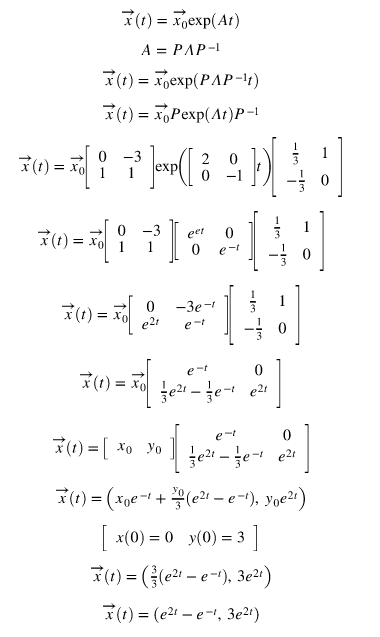

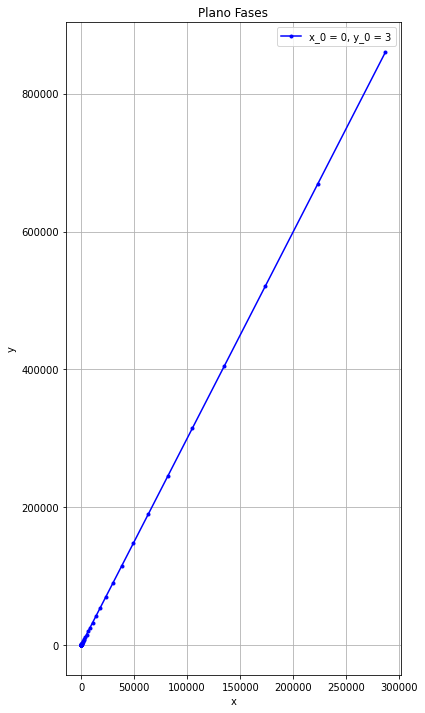

In [36]:
t = np.linspace( 0, 2*np.pi, 51 )

def x( t ):
  w1 = np.exp( 2*t ) - np.exp( -t )
  w2 = 3 * np.exp( 2*t )

  sol = np. array( [ w1, w2 ] )

  return sol

Solve = x( t )
xx = Solve[ 0, : ]
xy = Solve[ 1, : ]


plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "b.-", label = "x_0 = 0, y_0 = 3"  )
plt.legend( loc = "best" )
plt.title( "Plano Fases" )
plt.xlabel( "x" )
plt.ylabel( "y" )
plt.grid()
plt.show()

# **Ejercicio 7.** 
Resuelva los siguientes problemas de valor inicial.\
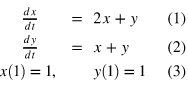

In [38]:
A = np.array( [ [ 2, 1 ], [ 1, 1 ] ] )
print( "A =", A )
p = np.trace(A)
print("Tr(A) = p = ", p)
q = la.det(A)
print("det(A) = q = ",q)

#Raices
dis = p**2 - 4*q

if (dis< 0): 
  absdis = abs (dis)
  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )
  print( " λ1 = ", λ1, "i" ) 
  print( " λ2 = ", λ2, "i" )
else:
  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 
  print( " λ1 = ", λ1 ) 
  print( " λ2 = ", λ2 )
  print( " " )
eigvals, eigvecs = la.eig( A )
print( eigvecs, " : Eigenvectores " )

eigvals = np.array( [ ( 3 + np.sqrt(5) )/2, ( 3 - np.sqrt(5) )/2 ] ) 
print( eigvals, " : Eigenvalores " )
print( " " )

v1 = np.array( [ [ 1 + np.sqrt( 5 ) ], 
                 [ 2 ] ] )
print( v1, " = v1 " )
print( " " )

v2 = np.array( [ [ 1 - np.sqrt( 5 ) ], 
                 [ 2 ] ] )
print( v2, " = v2 " )
print( " " )

eigvecs = np.array( [ [ 1 + np.sqrt( 5 ), 1 - np.sqrt( 5 ) ],
                      [ 2, 2 ] ] )
print( eigvecs, " : Eigenvectores " )
print( " " )

Λ = np.array( [ [ ( 3 + np.sqrt(5) )/2, 0 ], 
                [ 0, ( 3 - np.sqrt(5) )/2 ] ] )

print( Λ, " = Λ " )
print( " " )

print( eigvecs, " = P " )
print( " " )

print( la.inv( eigvecs ), " = P^-1 " )
print( " " )

prod = eigvecs @ Λ @ la.inv( eigvecs )

print( prod )

A = [[2 1]
 [1 1]]
Tr(A) = p =  3
det(A) = q =  1.0
 λ1 =  2.618033988749895
 λ2 =  0.3819660112501051
 
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]  : Eigenvectores 
[2.61803399 0.38196601]  : Eigenvalores 
 
[[3.23606798]
 [2.        ]]  = v1 
 
[[-1.23606798]
 [ 2.        ]]  = v2 
 
[[ 3.23606798 -1.23606798]
 [ 2.          2.        ]]  : Eigenvectores 
 
[[2.61803399 0.        ]
 [0.         0.38196601]]  = Λ 
 
[[ 3.23606798 -1.23606798]
 [ 2.          2.        ]]  = P 
 
[[ 0.2236068  0.1381966]
 [-0.2236068  0.3618034]]  = P^-1 
 
[[2. 1.]
 [1. 1.]]


Saltándonos los cálculos obtenemos que la solución del sistema de ecuaciones diferenciales es:\
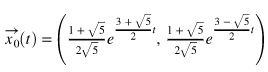

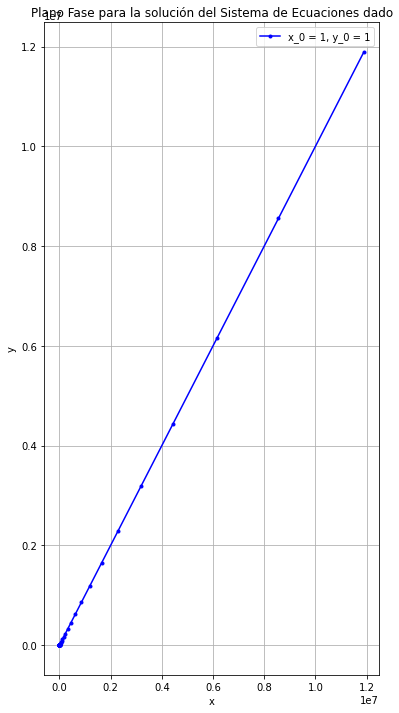

In [40]:
t = np.linspace( 0, 2*np.pi, 51 )
def x(t):
  fac = ( 1 + np.sqrt( 2 ) )/( 2*np.sqrt( 2 ) ) 
  f_e1 = ( 3 + np.sqrt( 5 ) )/( 2 ) 
  f_e2 = ( 3 - np.sqrt( 5 ) )/( 2 ) 
  w1 = fac * np.exp( f_e1 * t ) 
  w2 = fac * np.exp( f_e2 * t ) 
  sol = np.array( [ w1, w1 ] )
  return sol
Solve = x(t)
xx = Solve[ 0, : ]
xy = Solve[ 1, : ]
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "b.-", label = "x_0 = 1, y_0 = 1"  )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del Sistema de Ecuaciones dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
 
plt.grid()
plt.show()

# **Ejercicio 8.**
Resuelva el siguientes problemas de valor inicial.\
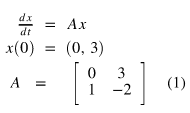

In [42]:
A = np.array( [ [ 0, 3 ], [ 1, -2 ] ] )
print("A = ", A)
p = np.trace (A)
print( "Tr(A) = p = ", p)
q = la.det(A)
print( "det(A) = q = ", q)

#Raices
dis = p**2 - 4*q

if ( dis < 0 ):
  absdis = abs ( dis )
  λ1 = ( p + np.sqrt( absdis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( absdis ) )*( 1/2 )  
  print( " λ1 = ", λ1, "i" ) 
  print( " λ2 = ", λ2, "i" )
else:
  λ1 = ( p + np.sqrt( dis ) )*( 1/2 )
  λ2 = ( p - np.sqrt( dis ) )*( 1/2 ) 
  print( " λ1 = ", λ1 ) 
  print( " λ2 = ", λ2 )
  print( " " )
eigvals, eigvecs = la.eig( A )

print( "Eigenvectores =", eigvecs )

A =  [[ 0  3]
 [ 1 -2]]
Tr(A) = p =  -2
det(A) = q =  -3.0
 λ1 =  1.0
 λ2 =  -3.0
 
Eigenvectores = [[ 0.9486833  -0.70710678]
 [ 0.31622777  0.70710678]]


In [43]:
eigvals = np.array( [ 1, -3 ] ) 
print( "Eigenvalores =", eigvals)
v1 = np.array( [ [ 3 ], 
                 [ 1 ] ] )
print( v1, " = v1 " )
v2 = np.array( [ [ -1 ], 
                 [ 1 ] ] )
print( "v2 = ", v2 )
eigvecs = np.array( [ [ 3, -1 ],
                      [ 1, 1 ] ] )
print( "Eigenvectores =", eigvecs)
Λ = np.array( [ [ 1, 0 ], 
                [ 0, -3 ] ] )
print( Λ, " = Λ " )
print( eigvecs, " = P " )
print( la.inv( eigvecs ), " = P^-1 " )
prod = eigvecs @ Λ @ la.inv( eigvecs )
print( prod )

Eigenvalores = [ 1 -3]
[[3]
 [1]]  = v1 
v2 =  [[-1]
 [ 1]]
Eigenvectores = [[ 3 -1]
 [ 1  1]]
[[ 1  0]
 [ 0 -3]]  = Λ 
[[ 3 -1]
 [ 1  1]]  = P 
[[ 0.25  0.25]
 [-0.25  0.75]]  = P^-1 
[[ 0.  3.]
 [ 1. -2.]]


Solución al sistema de ecuaciones diferenciales:\
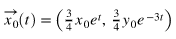

x0 = 0:\
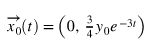

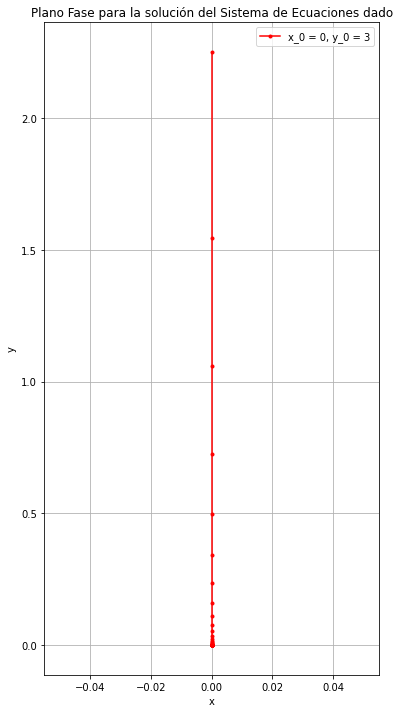

In [45]:
t = np.linspace( 0, 2*np.pi, 51 )
def x(t):
  x_0 = np.array( [ 0, 3 ] )
  x = x_0[ 0 ]
  y = x_0[ 1 ]
  w1 = ( 3/4 )*x*np.exp( t )
  w2 = ( 3/4 )*y*np.exp( -3*t )
  sol = np.array( [ w1, w2 ] )
  return sol
Solve = x(t)
xx = Solve[ 0, : ]
xy = Solve[ 1, : ]
plt.figure( figsize = ( 6, 12 ) )
plt.plot( xx, xy, "r.-", label = "x_0 = 0, y_0 = 3"  )
plt.legend( loc = "best" )
plt.title( "Plano Fase para la solución del Sistema de Ecuaciones dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )
plt.grid()
plt.show()

# **Ejercicio 9.**
Resuelva los siguientes problemas de valor inicial.\
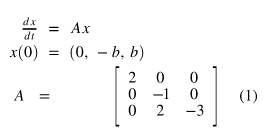

In [47]:
A = np.array( [ [ 2, 0, 0 ], [ 0, -1, 0 ], [ 0, 2, -3 ] ] )
print( "A =", A )
print( " " )

p = np.trace( A ) # Calculamos la traza de la matriz A
print( "Tr(A) = ", p )
print( " " )

q = la.det( A ) # Calculamos el determinante de la matriz A
print( "det(A) = ", q)
print( " " )

eigvals, eigvecs = la.eig( A )
print( "Eigenvalores = ",eigvals)
print( "Eigenvectores = ",eigvecs )

Λ = np.array( [ [ 2, 0, 0 ], 
                [ 0, -3, 0 ], 
                [ 0, 0, -1 ] ] )

print( "Λ = ", Λ )
print( " " )
prod = la.inv( eigvecs ) @ Λ @ eigvecs
print( prod )

A = [[ 2  0  0]
 [ 0 -1  0]
 [ 0  2 -3]]
 
Tr(A) =  -2
 
det(A) =  6.0
 
Eigenvalores =  [ 2.+0.j -3.+0.j -1.+0.j]
Eigenvectores =  [[1.         0.         0.        ]
 [0.         0.         0.70710678]
 [0.         1.         0.70710678]]
Λ =  [[ 2  0  0]
 [ 0 -3  0]
 [ 0  0 -1]]
 
[[ 2.          0.          0.        ]
 [ 0.         -1.          1.41421356]
 [ 0.          0.         -3.        ]]


In [48]:
eigvals = np.array( [ -1, 2, -3 ] )
print( " Eigenvalores = ", eigvals )
print( " " )

Λ = np.array( [ [ -1, 0, 0 ], 
                [ 0, 2, 0 ], 
                [ 0, 0, -3 ] ] )

print( "Λ =",Λ)
print( " " )

eig1 = np.array( [ [ 0 ], [ 1 ], [ 1 ] ] )
eig2 = np.array( [ [ 1 ], [ 0 ], [ 0 ] ] )
eig3 = np.array( [ [ 0 ], [ 0 ], [ 1 ] ] )
print( eig1, " = v1 " )
print( " " )
print( eig2, " = v2 " )
print( " " )
print( eig3, " = v3 " )
print( " " )

eigvec = np.array( [ [ 0, 1, 0 ],  
                     [ 1, 0, 0 ], 
                     [ 1, 0, 1 ] ] )

print( eigvec, " = P " )
print( " " )

print( la.inv( eigvec ), " = P^-1 " )
print( " " )

prod = eigvec @ Λ @ la.inv( eigvec ) 

print( prod, " = A " )

 Eigenvalores =  [-1  2 -3]
 
Λ = [[-1  0  0]
 [ 0  2  0]
 [ 0  0 -3]]
 
[[0]
 [1]
 [1]]  = v1 
 
[[1]
 [0]
 [0]]  = v2 
 
[[0]
 [0]
 [1]]  = v3 
 
[[0 1 0]
 [1 0 0]
 [1 0 1]]  = P 
 
[[-0.  1. -0.]
 [ 1.  0. -0.]
 [ 0. -1.  1.]]  = P^-1 
 
[[ 2.  0.  0.]
 [ 0. -1.  0.]
 [ 0.  2. -3.]]  = A 


Solución al sistema de ecuaciones:\
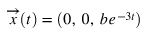

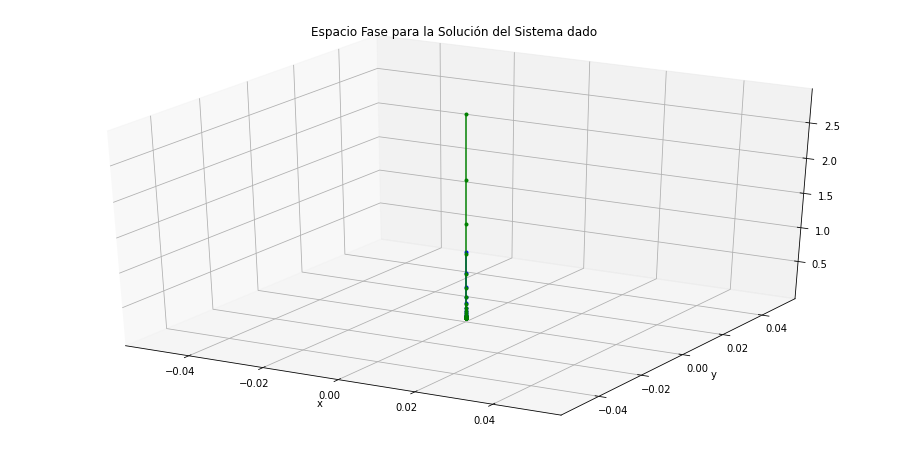

In [51]:
t = np.linspace( 0.01, 2*np.pi, 51 )
b1 = 1
b2 = 3
def x( t, b ):
  w1 = 0*np.exp( -t )
  w2 = 0*np.exp( 2*t )
  w3 = b*np.exp( -3*t ) 
  sol = np.array( [ w1, w2, w3 ] )
  return sol
Solve1 = x( t, b1 )
xx1 = Solve1[ 0, : ]
xy1 = Solve1[ 1, : ]
xz1 = Solve1[ 2, : ]
Solve2 = x( t, b2 )
xx2 = Solve2[ 0, : ]
xy2 = Solve2[ 1, : ]
xz2 = Solve2[ 2, : ]

fig = plt.figure( figsize = ( 16, 8 )) 
ax1 = fig.add_subplot( 111, projection = "3d" )
plt.plot( xx1, xy1, xz1, "b.-", label = " $c3$ = 1 " )
plt.plot( xx2, xy2, xz2, "g.-", label = " $c3$ = 3 " )
plt.title( "Espacio Fase para la Solución del Sistema dado" )
plt.xlabel( "x" )
plt.ylabel( "y" )

plt.show()

# **Ejercicio 10.**
Se tiene el siguiente sistema de resortes acoplados con dos masas.\
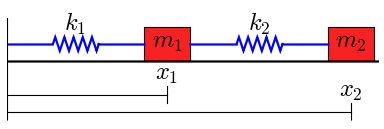
El sistema está sujeto del primer resorte de la izquierda. Cuando el sistema se deja en reposo, las longitudes de los resortes son L1 y L2.\
Las ecuaciones de movimiento están dadas por las siguientes ecuaciones diferenciales acopladas:\
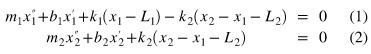

Encuentre las soluciones como funciones de t y grafiquelas, así como las trayectorias en el espacio fase. Suponga que L1 = L2 = 1 y que las masas son iguales m1 = m2 = 1.\
10.1) Encuentre los eigenvalores del sistema y diga como son las soluciones.\
10.2) Caso sin fricción. b1 = b2 = 0, k1 = 6, k2 = 4, condiciones iniciales (x1(0), x'1(0),x2(0), x'2(0)) = (1,0,4,0)\
10.3) Igual que el caso anterior pero, con fricción: b1=0.1, b2=0.2


**10.1)**

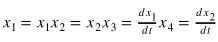

De esta forma podemos reescribir las ecuaciones originales de la siguiente forma:\
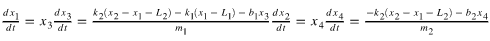
Si desarrollamos las fracciones de la segunda y cuarta expresión tenemos que:\
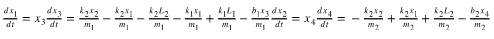
Si reorganizamos y reescribimos las ecuaciones tenemos que:\
13.png

Si definimos al vector de variables de la siguiente manera tenemos que:\
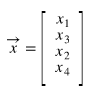
En consecuencia tenemos que las derivadas pueden ser reescritas cómo:\
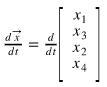
Por lo tanto podemos definir la matriz de las ecuaciones de la siguiente manera:\
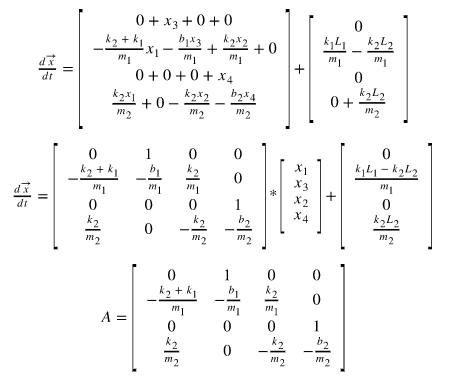



In [52]:
b1 = 0.5
k1 = 6
m1 = 1
b2 = 0.5
k2 = 4
m2 = 1
A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 )/m1, -b1/m1, k2/m1, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2/m2, 0, -k2/m2, -b2/m2 ] ] )
print( "b1 = ", b1)
print( "k1 = ", k1 )
print( "m1 = ", m1 )
print( " " )

print( "b2 = ", b2)
print( "k2 = ", k2 )
print( "m2 = ", m2 )
print( " " )

print( "A =", A)

eigvals, eigvecs = la.eig( A )
print( "Eigenvalores =",eigvals )
print( " " )
print( "Eigenvectores =",eigvecs)

b1 =  0.5
k1 =  6
m1 =  1
 
b2 =  0.5
k2 =  4
m2 =  1
 
A = [[  0.    1.    0.    0. ]
 [-10.   -0.5   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.5]]
Eigenvalores = [-0.25+3.45506874j -0.25-3.45506874j -0.25+1.39194109j -0.25-1.39194109j]
 
Eigenvectores = [[-0.01790287-2.47422612e-01j -0.01790287+2.47422612e-01j
  -0.04564355-2.54132511e-01j -0.04564355+2.54132511e-01j]
 [ 0.85933785+0.00000000e+00j  0.85933785-0.00000000e+00j
   0.36514837+6.93889390e-17j  0.36514837-6.93889390e-17j]
 [ 0.00895144+1.23711306e-01j  0.00895144-1.23711306e-01j
  -0.09128709-5.08265023e-01j -0.09128709+5.08265023e-01j]
 [-0.42966892-8.32667268e-17j -0.42966892+8.32667268e-17j
   0.73029674+0.00000000e+00j  0.73029674-0.00000000e+00j]]


**10.2)**

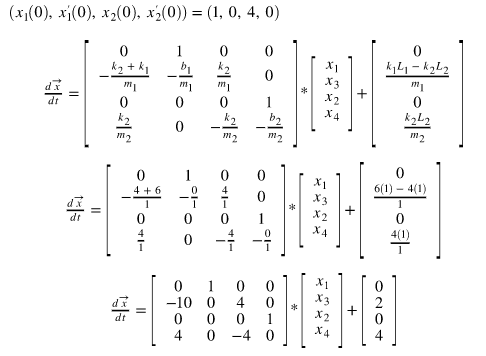


In [53]:
k1 = 6
b1 = 0
k2 = 4
b2 = 0
A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2,- b2 ] ] )
print( A, " = A " )
print( " " )
B = np.array( [ [ 0 ], 
                [ 2 ], 
                [ 0 ], 
                [ 4 ] ] )

def dXdt(X,t=0):
  return np.array( [ X[ 1 ], 
                     -( k2 + k1 )*X[ 0 ] - b1*X[ 1 ] + k2*X[ 2 ] ,  
                     X[ 3 ],   
                     -k2*X[ 2 ] + k2*X[ 0 ] ] )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0  ] )                                        
X0 = np.array( [ 1.0, 0.0, 4.0, 0.0 ] )   

print( "Puntos criticos del Sistema de Ecuaciones" )
print( "Xf0 = ", Xf0 ) 
print( " " )

# Verifiquemos que la derivada sí se haga 0 en los puntos criticos
all( dXdt( Xf0 ) == np.zeros( 4 ) ) 
print( " " )

# Definimos el Jacobiano
def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1 ],
                     [ k2, 0, -k2, 0 ] ] )

# Jacobiano evaluado en el punto critico
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print( " " )

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) 
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]  = A 
 
Puntos criticos del Sistema de Ecuaciones
Xf0 =  [0. 0. 0. 0.]
 
 
Jacobiano evaluado en punto critico
[[  0   1   0   0]
 [-10   0   4   0]
 [  0   0   0   1]
 [  4   0  -4   0]]
 
Eigenvalores del Jacobiano en X
λ1 =  (2.220446049250313e-16+3.464101615137756j)
λ2 =  (2.220446049250313e-16-3.464101615137756j)
λ3 =  (-1.3877787807814457e-16+1.414213562373095j)
λ4 =  (-1.3877787807814457e-16-1.414213562373095j)


Periodo:  1.813799364234217
[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

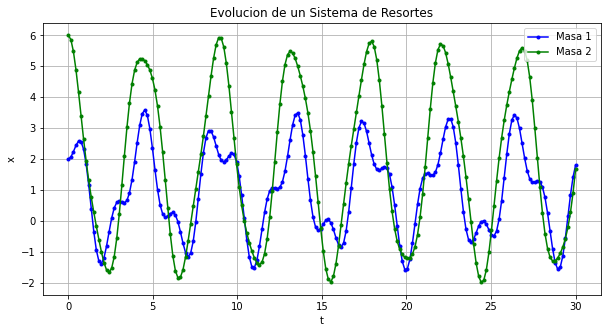

In [57]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( "Periodo: ", Tf1 )

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "b.-", label = "Masa 1" );
plt.plot( t, x2, "g.-", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best");
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

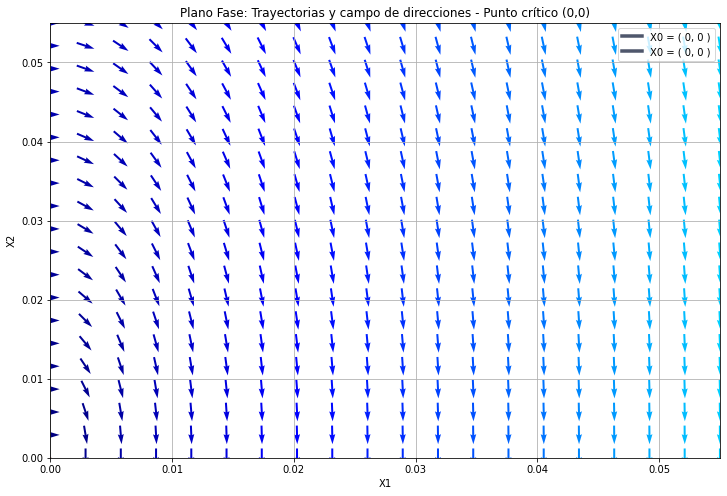

In [58]:
import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

Vals = np.linspace( 1, 10, 1 )
Vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( Vals ) ) ) 
plt.figure( figsize = ( 12, 8 ) ); 

# grafica las trayectorias

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 
    X = odeint( dXdt, X0, t ) 
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*V, Color = col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for V, col in zip( Vals, Vcolors ):
    X0 = V * Xf0 
    X = odeint( dXdt, X0, t )         
    # Integración para cada condición inicial
    plt.plot( X[ :,1 ], X[ :,3 ], lw =3.5*V, Color=col,
             label = "X0 = ( %.f, %.f )" % ( X0[ 1 ], X0[ 3 ] ) )

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max = plt.ylim( ymin = 0 )[ 1 ]   
x2max = plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 ,Y1 = np.meshgrid( x, y )     
X2 ,Y2 = np.meshgrid( x2, y2 )                    # crea la malla
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ] ) 
  # dX_df es una funcion # calcula la tasa de crecimiento
  # De 4 componentes necesito la de x1 y x2


M = ( np.hypot( DX1, DY1 ) ) # distancia euclideana 
M[ M == 0 ] = 1.             # Evita divisiones entre 0 
DX1 /= M                     # Normaliza el tamaño de cada flecha
DY1 /= M

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot = "mid", cmap=plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()

**10.3)**

b1=0.1, b2=0.2

In [59]:
k2=4
k1=6

b1=0.1
b2=0.2

A = np.array( [ [ 0, 1, 0, 0 ],
                [ -( k2 + k1 ), -b1, k2, 0 ],
                [ 0, 0, 0, 1 ],
                [ k2, 0, -k2, -b2 ] ] )

print( A, " = A " )
print( " " )

B = np.array( [ [ 0 ],
                [ 2 ],
                [ 0 ],
                [ 4 ] ] )

def dXdt( X, t = 0 ):
  return np.array( [ X[ 1 ], -( k2 + k1 )*X[ 0 ] -b1*X[ 1 ] + k2*X[ 2 ],  
                   X[ 3 ], -k2*X[ 2 ] + k2*X[ 0 ] ] )
  
B_sol = la.solve( A, -B )
print( B_sol )


Xf0 = np.array( [ 0.0, 0.0, 0.0, 0.0 ] ) # Puntos criticos del sistema

# Usando matriz aumentada de gauss

X0 = np.array( [ 0.0, 0.0, 2.0, 0.0 ] ) # Condiciones iniciales
print( " " )
print( "Puntos criticos del Sistema de Ecuaciones" )
print( "Xf0 = ", Xf0 )
print( " " )

all( dXdt( Xf0 ) == np.zeros( 4 ) ) 

def d2Xdt2( X, t = 0 ):
  return np.array( [ [ 0, 1, 0, 0 ], 
                     [ -( k2 + k1 ), -b1, k2, 0 ], 
                     [ 0, 0, 0, 1],
                     [ k2, 0, -k2, 0 ] ] )
  
# Jacobiano evaluado en el punto critico
 
Af1 = d2Xdt2( Xf0 )
print( "Jacobiano evaluado en punto critico" )
print( Af1 )
print( " " )

λ1, λ2, λ3, λ4 = la.eigvals( Af1 )
print( "Eigenvalores del Jacobiano en X" ) 
print( "λ1 = ", λ1 )
print( "λ2 = ", λ2 )
print( "λ3 = ", λ3 )
print( "λ4 = ", λ4 )

[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.   -0.2]]  = A 
 
[[1.]
 [0.]
 [2.]
 [0.]]
 
Puntos criticos del Sistema de Ecuaciones
Xf0 =  [0. 0. 0. 0.]
 
Jacobiano evaluado en punto critico
[[  0.    1.    0.    0. ]
 [-10.   -0.1   4.    0. ]
 [  0.    0.    0.    1. ]
 [  4.    0.   -4.    0. ]]
 
Eigenvalores del Jacobiano en X
λ1 =  (-0.03999936001028768+3.463593494852212j)
λ2 =  (-0.03999936001028768-3.463593494852212j)
λ3 =  (-0.010000639989712207+1.414291364612996j)
λ4 =  (-0.010000639989712207-1.414291364612996j)


Periodo:  1.8139444972104801
 
[[1.]
 [0.]
 [2.]
 [0.]]


<Figure size 432x288 with 0 Axes>

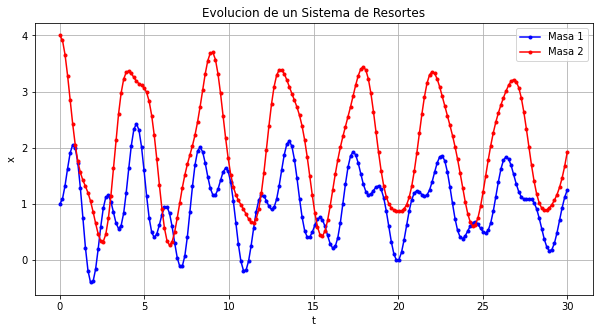

In [61]:
Tf1 = 2*np.pi/abs( λ1 ) 
print( "Periodo: ", Tf1 )
print( " " )
  # T_f2 = 2*np.pi/abs(lambda3) 
  # print('Periodo 2:', T_f1)

# Ahora busquemos la solucion

t = np.linspace( 0, 30, 200 )

X, infodict = odeint( dXdt, X0, t, full_output = True )
infodict[ "message" ]

B_sol = la.solve( A, -B )
print( B_sol )

x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( t, x1, "b.-", label = "Masa 1" );
plt.plot( t, x2, "r.-", label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

<Figure size 432x288 with 0 Axes>

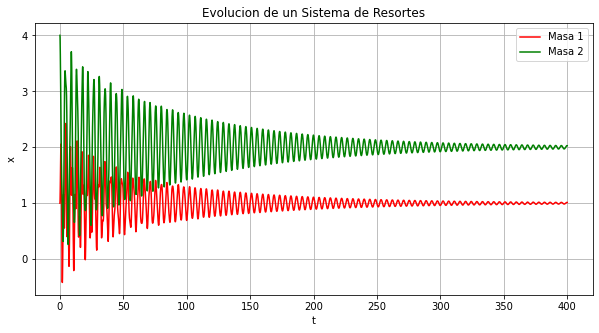

In [62]:
tr = np.linspace( 0, 400, 4000 )

X, infodict = integrate.odeint ( dXdt, X0, tr, full_output = True )
infodict[ "message" ]
x1, x3, x2, x4 = X.T + B_sol

f1 = plt.figure();
plt.figure( figsize = ( 10, 5 ) ); 
plt.plot( tr, x1, 'b-', label = "Masa 1" );
plt.plot( tr, x2, 'r-', label = "Masa 2" );
plt.grid();

plt.legend( loc = "best" );
plt.xlabel( "t" );
plt.ylabel( "x" );
plt.title( "Evolucion de un Sistema de Resortes" );
plt.show();

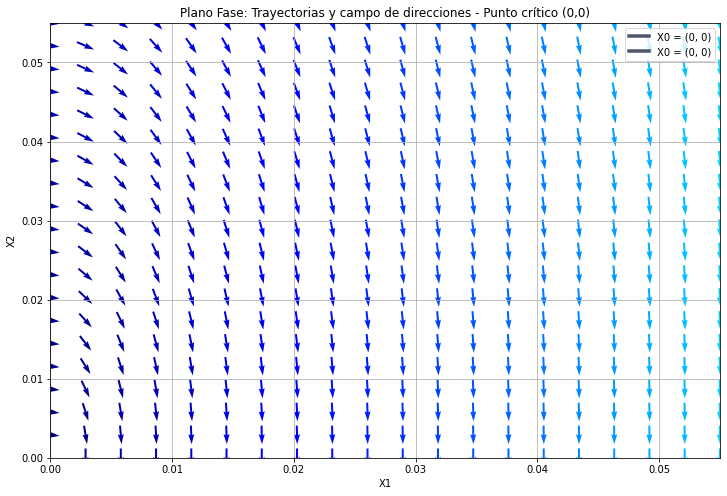

In [63]:

import numpy as np
from scipy import integrate, linalg
import pylab as plt
from matplotlib import cm

# Graficamos la familia de soluciones en el espacio fase para distintas condiciones iniciales

values  = np.linspace( 1, 10, 1 ) 
vcolors = plt.cm.cividis( np.linspace( 0.3, 1., len( values ) ) ) # colores para cada trayectoria
plt.figure(figsize=( 12, 8 ) ); 

# grafica las trayectorias

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 0 ], X[ :, 2 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 0 ], X0[ 2 ] ) )
    
ymax = plt.ylim( ymin = 0 )[ 1 ] # get axis limits
xmax = plt.xlim( xmin = 0 )[ 1 ]

for v, col in zip( values, vcolors ):
    X0 = v * Xf0 # punto inicial
    X = integrate.odeint( dXdt, X0, t ) # Integración para cada condición inicial
    plt.plot( X[ :, 1 ], X[ :, 3 ], lw = 3.5*v, color = col,
             label = "X0 = (%.f, %.f)" % ( X0[ 1 ], X0[ 3 ]) )   

# Define una malla y calcula la pendiente (dirección) en cada punto

y2max= plt.ylim( ymin = 0 )[ 1 ]   
x2max= plt.xlim( xmin = 0 )[ 1 ] 
nb_points = 20

x = np.linspace( 0, xmax, nb_points )
y = np.linspace( 0, ymax, nb_points )
x2 = np.linspace( 0, x2max, nb_points )
y2 = np.linspace( 0, y2max, nb_points )

X1 , Y1 = np.meshgrid( x, y )     
X2 , Y2 = np.meshgrid( x2, y2 )                
DX1, DY1, DX2, DY2 = dXdt( [ X1, Y1, X2, Y2 ]) 
                   


M = ( np.hypot( DX1, DY1 ) ) 
M[ M == 0] = 1.              
DX1 /= M                     
DY1 /= M


# Dibujar los campos de direcciones usando la función quiver de Matplotlib 
# EL color de las flechas indica la rapidez de crecimiento

plt.title( "Plano Fase: Trayectorias y campo de direcciones - Punto crítico (0,0)" )
Q = plt.quiver( X1, Y1, DX1, DY1, M, pivot="mid", cmap = plt.cm.jet )
plt.xlabel( "X1" )
plt.ylabel( "X2" )
plt.legend( loc = "best" )
plt.grid()

plt.xlim( 0, xmax )
plt.ylim( 0, ymax )
plt.show()